In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%run -i ../Modeling/Model_Eval.ipynb

In [3]:
training_data = pd.read_csv('../Datasets/training_data_with_aqi.csv').sample(frac=1)

In [8]:
numerical_features = get_numerical_features(training_data)

In [10]:
training_data = training_data[numerical_features]

Originally has 44 features, probably too many

In [12]:
training_data.shape

(27119, 44)

Scale the data prior to PCA

In [15]:
scaler = StandardScaler()
scaler.fit(training_data)
training_data_scaled = scaler.transform(training_data)

In [16]:
from sklearn.decomposition import PCA

In [18]:
pca_44 = PCA(n_components=44, random_state=2023)
pca_44.fit(training_data_scaled)

PCA(n_components=44, random_state=2023)

In [19]:
X_pca_44 = pca_44.transform(training_data_scaled)

In [22]:
pca_44.explained_variance_ratio_ * 100

array([2.90199222e+01, 1.57703648e+01, 1.08927757e+01, 5.86053769e+00,
       3.69111647e+00, 3.37855213e+00, 2.97126052e+00, 2.83758161e+00,
       2.44966647e+00, 2.23509816e+00, 2.20019165e+00, 1.80505872e+00,
       1.69175119e+00, 1.47864601e+00, 1.38780936e+00, 1.23654785e+00,
       1.15141521e+00, 1.08358954e+00, 9.60140524e-01, 9.26846088e-01,
       7.86770966e-01, 7.82603681e-01, 6.93973217e-01, 6.32915928e-01,
       5.69795710e-01, 5.45750140e-01, 4.98643154e-01, 4.30872974e-01,
       3.70012228e-01, 3.38820699e-01, 2.94512725e-01, 2.41002345e-01,
       1.79120925e-01, 1.68615775e-01, 9.66277718e-02, 7.25873412e-02,
       6.41830804e-02, 4.89430632e-02, 4.67959877e-02, 3.95556468e-02,
       2.23790356e-02, 2.01353298e-02, 1.55385260e-02, 1.09718624e-02])

In [24]:
np.cumsum(pca_44.explained_variance_ratio_ * 100)

array([ 29.01992216,  44.79028698,  55.6830627 ,  61.54360038,
        65.23471685,  68.61326898,  71.5845295 ,  74.42211112,
        76.87177759,  79.10687574,  81.3070674 ,  83.11212612,
        84.80387731,  86.28252332,  87.67033268,  88.90688053,
        90.05829574,  91.14188528,  92.1020258 ,  93.02887189,
        93.81564286,  94.59824654,  95.29221975,  95.92513568,
        96.49493139,  97.04068153,  97.53932468,  97.97019766,
        98.34020989,  98.67903058,  98.97354331,  99.21454565,
        99.39366658,  99.56228236,  99.65891013,  99.73149747,
        99.79568055,  99.84462361,  99.8914196 ,  99.93097525,
        99.95335428,  99.97348961,  99.98902814, 100.        ])

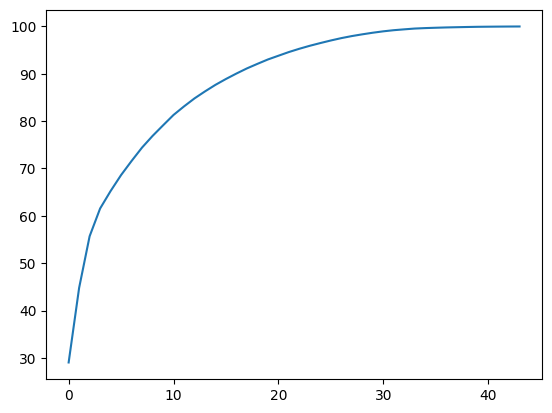

In [26]:
plt.plot(np.cumsum(pca_44.explained_variance_ratio_ * 100))

In [27]:
pca_44.components_

array([[ 0.15140259, -0.1030493 , -0.04616445, ..., -0.07602349,
         0.07533443,  0.01658457],
       [-0.14777992,  0.18538823, -0.025719  , ...,  0.28092758,
        -0.02347353, -0.00849796],
       [ 0.18847677, -0.05161663,  0.00861873, ...,  0.17304696,
         0.01416278,  0.04178736],
       ...,
       [-0.03345065,  0.02467422, -0.01071384, ...,  0.02592841,
         0.00438947,  0.01596876],
       [ 0.01662125,  0.01453252,  0.00451866, ...,  0.00297567,
        -0.00491868, -0.00434931],
       [ 0.02736566,  0.00847806,  0.00349809, ...,  0.05652094,
        -0.00435479,  0.0046958 ]])

In [29]:
principal_df = pd.DataFrame(X_pca_44, columns=numerical_features)

In [31]:
correlation_matrix = training_data.corrwith(principal_df)

In [33]:
pca_44.components_[0]

array([ 0.15140259, -0.1030493 , -0.04616445, -0.02914708,  0.21351646,
       -0.05865211, -0.20822606,  0.0297578 ,  0.25588174, -0.00532242,
        0.1720575 ,  0.08186059,  0.05672424,  0.01109688,  0.19620161,
       -0.05387112,  0.25131185,  0.07484882,  0.14969368,  0.03775753,
       -0.01515097,  0.08138869,  0.26033725,  0.03285576,  0.22126128,
        0.0535016 ,  0.26501943, -0.00667953,  0.19028341, -0.03558092,
        0.2656354 , -0.05062884,  0.24805118, -0.11293681,  0.19944617,
        0.00275761,  0.23346711, -0.01416412,  0.26579339, -0.02837239,
        0.26589122, -0.07602349,  0.07533443,  0.01658457])